In [27]:
# Read the query image as query_img 
# and train image This query image 
# is what you need to find in train image 
# Save it in the same directory 
# with the name image.jpg 
# Convert it to grayscale 
# Initialize the ORB detector algorithm 
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
# Show the final image 

In [1]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt 

In [4]:
def read(img):
    img = cv.imread(img)
    imgGray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    return img, imgGray

In [16]:
def view(images):
    titles = ['query','query gray','train','train gray']
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

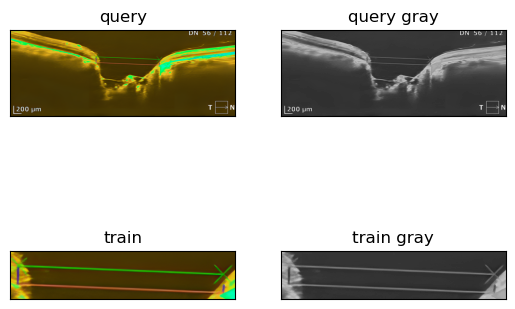

In [36]:
query_img, query_img_bw = read('query.png') 
train_img, train_img_bw = read('train3.png') 
view([query_img, query_img_bw, train_img, train_img_bw])

In [40]:
orb = cv.ORB_create() 
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 

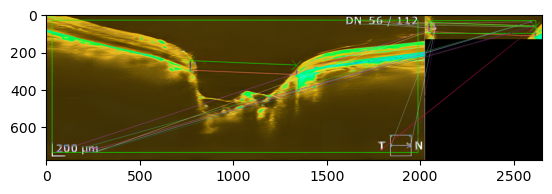

In [41]:
matcher = cv.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
final_img = cv.drawMatches(query_img, queryKeypoints, train_img, trainKeypoints, matches[:20],None) 
# final_img = cv.resize(final_img, (1000,650))
plt.imshow(final_img) 

In [42]:
cv.imwrite('match.png',final_img)

True

In [39]:
# Extract matched keypoints coordinates and convert to numpy arrays
query_points = np.array([queryKeypoints[match.queryIdx].pt for match in matches], dtype=np.float32)
train_points = np.array([trainKeypoints[match.trainIdx].pt for match in matches], dtype=np.float32)

# Check if points arrays are non-empty
if len(query_points) > 0:
    # Calculate bounding box in query image
    x_query, y_query, w_query, h_query = cv.boundingRect(query_points)
    cv.rectangle(query_img, (int(x_query), int(y_query)), (int(x_query + w_query), int(y_query + h_query)), (0, 255, 0), 2)
else:
    print("No matched keypoints found in query image.")

if len(train_points) > 0:
    # Calculate bounding box in train image
    x_train, y_train, w_train, h_train = cv.boundingRect(train_points)
    cv.rectangle(train_img, (int(x_train), int(y_train)), (int(x_train + w_train), int(y_train + h_train)), (0, 255, 0), 2)
else:
    print("No matched keypoints found in train image.")

# Display images with bounding boxes
cv.imshow("Query Image with Matched Area", query_img)
cv.imshow("Train Image with Matched Area", train_img)
cv.waitKey(0)
cv.destroyAllWindows()